# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [130]:
import pandas as pd
import numpy as np
from google.colab import files

url='https://raw.githubusercontent.com/jac7az/wrangling-homework/refs/heads/main/assignment/data/airbnb_hw.csv'
airbnb=pd.read_csv(url)

url2='https://raw.githubusercontent.com/jac7az/wrangling-homework/refs/heads/main/assignment/data/mn_police_use_of_force.csv'
force=pd.read_csv(url2)

url3 = 'https://github.com/jac7az/wrangling-homework/raw/refs/heads/main/assignment/data/justice_data.parquet'
df = pd.read_parquet(url3)

uploaded=files.upload()

Saving GSAF5.xls to GSAF5 (1).xls


In [ ]:
airbnb['Price'] = airbnb['Price'].replace(',', '').astype(int)
pd.to_numeric(airbnb['Price'],errors='coerce')
print(airbnb['Price'].unique)

#I replaced all commas with empty strings so that the numbers in the price column
  #can be converted into integers correctly. I was not left with any null values.

<bound method Series.unique of 0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64>


In [ ]:
counts=pd.crosstab([force['force_type'],force['force_type_action']],force['subject_injury'],normalize='index')
counts
def injuries(forceType,forceAction):
  result=''
  try:
    if counts.loc[(forceType,forceAction),'Yes']>=0.6:
      result='Yes'
    elif counts.loc[(forceType,forceAction),'Yes']<0.6:
      result='No'
  except:
    result='Missing'
  return result
for i in range(force.shape[0]):
  if pd.isnull(force["subject_injury"][i]):
    result=injuries(force['force_type'][i],force['force_type_action'][i])
    force.loc[i,'subject_injury']=result
pd.crosstab(force['force_type'],force['subject_injury'],normalize='index')

#In the 'subject_injury' column, about 75% of the entries started off null, which is quite concerning. This implies that the sources of data are unreliable,
  #the people gathering the data are unreliable. They are unwilling to be accurate or reveal data that would negatively impact them, but that only skews the analysis and results to be more inaccurate.
#NaN values seem to be more common the more violent the specific force action is, likely because it caused more severe injuries than appropriate, and the police want to avoid exposing themselves.

subject_injury,Missing,No,Yes
force_type,,,
Baton,0.250000,0.000000,0.750000
Bodily Force,0.481336,0.382185,0.136479
Chemical Irritant,0.000000,0.974262,0.025738
Firearm,0.000000,1.000000,0.000000
Gun Point Display,0.000000,0.576923,0.423077
Improvised Weapon,0.459459,0.243243,0.297297
Less Lethal,1.000000,0.000000,0.000000
Less Lethal Projectile,0.000000,0.333333,0.666667
Maximal Restraint Technique,1.000000,0.000000,0.000000


In [ ]:
df['WhetherDefendantWasReleasedPretrial']=df['WhetherDefendantWasReleasedPretrial'].replace(9,np.nan)
df['WhetherDefendantWasReleasedPretrial'].isnull().sum()

In [ ]:
df['ImposedSentenceAllChargeInContactEvent']

df['SentenceTypeAllChargesAtConvictionInContactEvent']=df['SentenceTypeAllChargesAtConvictionInContactEvent'].replace(9,np.nan)
df['SentenceTypeAllChargesAtConvictionInContactEvent']=df['SentenceTypeAllChargesAtConvictionInContactEvent'].dropna()
pd.crosstab(df['SentenceTypeAllChargesAtConvictionInContactEvent'],df['ImposedSentenceAllChargeInContactEvent'])

#Since 9 from variable SentenceTypeAllChargesAtConvictionInContactEvent means not applicable or unclear according to the documentation,
  #the data is not relevant here and can be dropped.

ImposedSentenceAllChargeInContactEvent,,.0328542094455852,.0657084188911704,.0985626283367557,.131416837782341,.164271047227926,.197125256673511,.262833675564682,.328542094455852,.394250513347023,...,94.1642710472279,95,96,96.0328542094456,960,98,98.95687885,99,99.3285420944559,99.4928131416838
SentenceTypeAllChargesAtConvictionInContactEvent,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,3,2,4,26,0,0,276,0,...,0,0,7,0,0,0,0,0,0,0
1.0,0,6,21,6,10,33,6,3,337,3,...,1,0,11,1,0,0,0,1,1,1
2.0,0,0,0,0,0,0,0,0,0,0,...,0,1,21,0,1,1,1,0,0,0
4.0,8779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Axes(0.125,0.11;0.775x0.77)
750


10.7357572287432

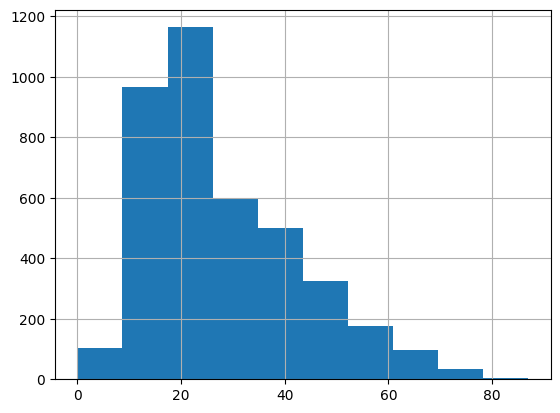

In [186]:
sharks=pd.read_excel('GSAF5.xls')
sharks=sharks.dropna(axis=1,how='all')
sharks.columns = sharks.columns.str.strip()
sharks['Year'].fillna(0).round().astype(int)
sharks['Year'].replace('nan',0,regex=True)
sharks['Year'].unique()
#There are null value for years and apparently the data stretches all the way back to the 1500s and before, even including year 77 and 5.
  #Year 0 is also included, which is highly unlikely to be accurate, and perhaps a placeholder for unknown year. There's also a year 2026, which just isn't possible.
#With that said, the shark attack frequencies appear to be decreasing every year.
sharks1940=sharks[sharks['Year']>=1940]
#sharks1940['Year'].hist()
#The shark attack frequencies seem to have shot up from around 1980s until 2020, where COVID likely decreased the number of attacks

sharks['Age'].unique()
sharks['Age']=sharks['Age'].replace(['50 & 30','86', '28, 23 & 30','36 & 23','17 & 35', '34 & 19','37, 67, 35, 27,  ? & 27', '21, 34,24 & 35','9 & 60','7      &    31','45 and 15','(adult)','adult','a minor','young','"young"','?','nan','M','MAKE LINE GREEN','!!','X','A.M.','  ','\xa0','F','\xa0 ',' '],np.nan)
sharks['Age']=sharks['Age'].replace({'9 months':0,'2 to 3 months':0,'18 months':1,'!2':2,'2½':2,'6½':6,'7 or 8':7,'!6':6,'8 or 10':9,'9 or 10':9,'9 & 12':10,'10 or 12':11,'Both 11':11,'12 or 13':12,'13 or 14':13,'13 or 18':15,'Teen':16,
                                     '?    &   14':14,'17 & 16':16,'Teens':16,'teen':16,'16 to 18':17,'? & 19':19,'18 or 20':19,'20?':20,'23 & 20':21,'18 to 22':20,'21 or 26':23,'20/30':25,'21 & ?':21,'28 & 22':25,'23 & 26':24,'28 & 26':27,
                                     "20's":25,'mid-20s':25,'20s':25,'25 or 28':26,'33 & 26':29,'25 to 35':30,'32 & 30':31,'30 & 32':31,'36 & 26':31,'31 or 33':32,'30 or 36':33,'Ca. 33':33,'30s':35,'mid-30s':35,'33 & 37':35,'46 & 34':40,
                                     '33 or 37':35,'Middle age':40,'"middle-age"':40,' 43':43,'40s': 45, '50s': 55,'>50':55,"60's":65,'60+':65,'Elderly':65,'60s':65})
sharks['Age']=pd.to_numeric(sharks['Age'],errors='coerce')
sharks['Age'].unique()
print(sharks['Age'].hist()) #Most of the attack victims are young adults and children.

sharks['Sex']=sharks['Sex'].replace([' M', 'M ','M x 2'],'M')
sharks['Sex']=sharks['Sex'].replace(['.','N','lli'],'Unknown')
sharks['Sex']=sharks['Sex'].fillna('Unknown')
sharks['Sex'].value_counts(normalize=True) #80% of shark attack victims are male O.o

sharks['Type']=sharks['Type'].replace(['Questionable','?', 'Unconfirmed','Unverified', 'Invalid', 'Under investigation'],'Unknown')
sharks['Type']=sharks['Type'].replace(' Provoked','Provoked')
sharks['Type']=sharks['Type'].replace(['Sea Disaster','Boat','Watercraft'],'Unprovoked')
sharks['Type']=sharks['Type'].fillna('Unknown')

sharks['Fatal Y/N']=sharks['Fatal Y/N'].replace(['F', 'M','n', 'UNKNOWN', 2017],'Unknown')
sharks['Fatal Y/N']=sharks['Fatal Y/N'].fillna('Unknown')
sharks['Fatal Y/N']=sharks['Fatal Y/N'].replace([' N','N ','Nq'],'N')
sharks['Fatal Y/N']=sharks['Fatal Y/N'].replace(['Y x 2','y'],'Y')

pd.crosstab(sharks['Sex'],sharks['Fatal Y/N'])
#Sharks are more likely to simply attack males, but unprovoked attacks are far more common in general.
#A large number of attack fatality are marked as unknown. Unprovoked attacks are more likely to be fatal though. Attacks with male victims are more likely to be fatal.
#As a female, I don't feel too worried about becoming a victim of shark attacks. However, there is very little evidence to show that sex has any influence ont he cause of shark attacks.
  #Additionally, through cleaning this data set, I learned that this data was not collected in an organized manner which brings me to question its reliability in the information and results.
species_split=sharks['Species'].dropna().str.split()
sharks['Species'].dtype
white_shark_count=0
for i in species_split:
  for word in i:
    if 'white' in word.lower():
      white_shark_count+=1
white_shark_count/6986*100
#About 11% of shark attacks involve a white shark.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?